## Imports

In [4]:
import os, glob
import pandas as pd

## Google Colab - use this part

### Google Drive pre-requisite

In [5]:
# Only works within Google Colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

### Loading the list of HRV files

In [ ]:
# Change of directory to be in the folder where HRV files are
path_to_hrv_files = '/content/drive/MyDrive/core simulateur/data/'
os.chdir(path_to_hrv_files)

In [ ]:
# Create a list that contains all of the files present in the "data" directory ending with ".txt"
list_hrv_files = []
for file in glob.glob("*.txt"):
    list_hrv_files.append(file)

## Jupyter Notebook - use this part

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from DDDS.drive import Drive
import pandas as pd

In [16]:
drive = Drive()

Connected successfully!


In [4]:
files_list = drive.list('txt')

In [5]:
try:
    files_list.remove({'id': '1-RP7PFAXBlDnUsWAb2ck9mcJ_6uePpbh', 'name': 'Signaux HRV Garmin.txt'})
except:
    pass

In [6]:
try:
    files_list.remove({'id': '1-LZsP3Nm4FfSC7jC47NQBBqW1dfYQoJ2', 'name': 'Signaux HRV multi-capteurs.txt'})
except:
    pass

In [7]:
files_df = pd.DataFrame(files_list)

In [8]:
list_hrv_files = list(files_df.name)
list_hrv_files

['22_11_2021_15_38_garmin eb0.txt',
 '22_11_2021_15_38 eb0.txt',
 '07_01_2022_13_56.txt',
 '05_01_2022_15_18.txt',
 '05_01_2022_15_14.txt',
 '05_01_2022_15_12.txt',
 '05_01_2022_15_07.txt',
 '05_01_2022_15_01.txt',
 '15_12_2021_11_23_garmin.txt',
 '15_12_2021_11_23.txt',
 '15_12_2021_11_20.txt',
 '07_12_2021_14_35_garmin ea9.txt',
 '07_12_2021_14_35 ea9.txt',
 '07_12_2021_14_20.txt',
 '07_12_2021_14_13.txt',
 '01_12_2021_13_17_garmin e99.txt',
 '01_12_2021_13_17 e99.txt',
 '01_12_2021_13_13.txt',
 '30_11_2021_16_12_garmin ece.txt',
 '30_11_2021_16_12 ece.txt',
 '30_11_2021_12_32_garmin eb0.txt',
 '30_11_2021_12_32 eb0.txt',
 '29_11_2021_13_47_garmin eca.txt',
 '26_11_2021_12_31_garmin 1c3.txt',
 '26_11_2021_15_09_garmin ea9.txt',
 '26_11_2021_10_50_garmin ed2.txt',
 '26_11_2021_15_09 ea9.txt',
 '29_11_2021_13_47 eca.txt',
 '26_11_2021_12_31 1c3.txt',
 '26_11_2021_10_50 ed2.txt',
 '25_11_2021_13_42 ed2.txt',
 '25_11_2021_10_42 038.txt',
 '24_11_2021_10_52_garmin eca.txt',
 '24_11_2021_1

## HRV signals

### Generating list of HRV files to download

*   HRV simple sensor 1
*   HRV simple sensor 2
*   HRV garmin sensor

In [9]:
# Create two lists from the list of HRV files - 1 for simple sensor & 1 for garmin sensor
list_hrv_files_simple_sensor = [elem for elem in list_hrv_files if elem.find('garmin') == -1]
list_hrv_files_garmin = [elem for elem in list_hrv_files if elem.find('garmin') != -1]

In [10]:
# Create a list that would be needed to split the simple sensor list into two lists
# It is due to differences in the output of simple sensor files
key_list = []
for key in range(20,31):
    key_list.append(str(key) + '_10_2021')

In [11]:
# Create the two lists from the simple sensor list
list_hrv_files_simple_sensor_1 = []
list_hrv_files_simple_sensor_2 = []
for file in list_hrv_files_simple_sensor:
    if (file[:10] in key_list) and (file != '29_10_2021_13_32 982.txt'):
        list_hrv_files_simple_sensor_2.append(file)
    else:
        list_hrv_files_simple_sensor_1.append(file)

In [12]:
# Create list of Headers for each type of HRV files
headers_list_simple_sensor = ['Timestamp_Google', 'Timestamp_Device', 'Device_id', 'Heart_Rate', 'RR_rate']
headers_list_garmin_sensor = ['Timestamp_Google', 'Timestamp_Device', 'RR_rate']
headers_list_simple_sensor_2 = ['Timestamp_Google', 'Device_id', 'Heart_Rate', 'RR_rate']

In [13]:
# Create a dictionary to match each HRV file with its associated Headers
dict_hrv_files = {
    'sensors_list':[list_hrv_files_simple_sensor_1,list_hrv_files_simple_sensor_2,list_hrv_files_garmin],
    'headers_type':[headers_list_simple_sensor, headers_list_simple_sensor_2, headers_list_garmin_sensor]
}

### Create the list of dataframes

#### Within Google Colab

In [ ]:
# Create the list of dataframes of all the HRV files
def list_dataframes(path_to_hrv_files, dict_hrv_files):
    df_list = []
    index = 0

    for sensor_list in dict_hrv_files['sensors_list']:
        for sensor in sensor_list:
            df = pd.read_csv(path_to_hrv_files + sensor, sep=";", header=None, names=dict_hrv_files['headers_type'][index])
            df['file_name'] = sensor
            if sensor.find('garmin') != -1:
                df['Garmin'] = 1
            else:
                df['Garmin'] = 0
            df_list.append(df)
        index += 1

    return df_list

In [ ]:
dataframes = list_dataframes(path_to_hrv_files, dict_hrv_files)

#### Within Jupyter Notebook

In [14]:
sensor = dict_hrv_files['sensors_list'][0][1]

In [15]:
sensor

'07_01_2022_13_56.txt'

In [16]:
files_df[files_df.name == '07_01_2022_13_56.txt'].id

2    17G_KneZjeL5-wII3iDOcHFMSmcnJ09RZ
Name: id, dtype: object

In [17]:
# Create the list of dataframes of all the HRV files
def list_dataframes(files_df, dict_hrv_files):
    df_list = []
    index = 0

    for sensor_list in dict_hrv_files['sensors_list']:
        for sensor in sensor_list:
            file_id = list(files_df[files_df.name == sensor].id)[0]
            file = drive.download(file_id)
            df = pd.read_csv(file, sep=";", header=None, names=dict_hrv_files['headers_type'][index])
            df['file_name'] = sensor
            if sensor.find('garmin') != -1:
                df['Garmin'] = 1
            else:
                df['Garmin'] = 0
            df_list.append(df)
        index += 1

    return df_list

In [18]:
dataframes = list_dataframes(files_df, dict_hrv_files)

### Combined all HRV dataframes into a main one (HRV_df)

In [19]:
# Create a main dataframe containing all HRV dataframes combined
def combine_df(df_list):
    for index, df in enumerate(df_list):
        if index == 0:
            HRV_df = df.copy()
        if index != 0:
            HRV_df = pd.concat([HRV_df,df], axis=0, ignore_index=True)
    return HRV_df

In [20]:
HRV_df = combine_df(dataframes)

### Formatting

In [21]:
# Format the Timestamp features
def timestamp_formatting(df, *args):
    for timestamp in args:
        df[timestamp] = df[timestamp].apply(lambda x: pd.Timestamp(x, unit="ms"))
    return df

In [22]:
# Allow to drop useless columns
def drop_columns(df, *args):
    for column in args:
        df.drop(column, axis=1, inplace=True)
    return df

In [23]:
HRV_df = timestamp_formatting(HRV_df, 'Timestamp_Google', 'Timestamp_Device')
HRV_df = drop_columns(HRV_df)

### Combined DataFrame

In [24]:
ddf = HRV_df[(HRV_df.file_name == '22_11_2021_15_38 eb0.txt') & (HRV_df.Device_id == 'CA:93:07:67:1E:FF')]

In [25]:
ddf.RR_rate

1        [779, 743]
5             [773]
9             [806]
13            [847]
17       [799, 779]
            ...    
16699            []
16703            []
16706            []
16710            []
16714            []
Name: RR_rate, Length: 4156, dtype: object

In [26]:
list_RR = []
for i in ddf.RR_rate:
    if len(i) == 5:
        list_RR.append(int(i[1:4]))
    elif len(i) == 10:
        list_RR.append(int(i[1:4]))
        list_RR.append(int(i[6:9]))
    else:
        pass

In [27]:
x_RR = []
cumul = 0
for i in list_RR:
    cumul += i
    x_RR.append(cumul)

In [28]:
series_RR = pd.Series(list_RR)

In [29]:
len(series_RR)

5367

In [30]:
import matplotlib.pyplot as plt


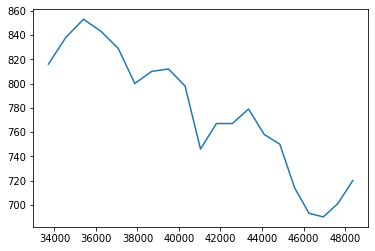

In [31]:
window_start, window_end = 40, 60
plt.plot(x_RR[window_start:window_end], series_RR[window_start:window_end])

## Combining with Video Annotations 

In [32]:
files_list = drive.list('csv', add_query="'1-yIXpLgb_gMzgnaT2Wxl0ckHhRmp47KU' in parents")



In [33]:
files_list

[{'id': '11D-Lanp1cp03piT0y7FcvdTP3b27LP9O',
  'name': 'Christophe-2021-10-28 09-28-56 844.flv.csv'},
 {'id': '11mnlOUXETTsZO6w0R5jCxKkPPDcosNpL',
  'name': 'validateur-2021-11-22 15-40-50 eb0.flv.csv'},
 {'id': '1HEjJJt7lX77D2dO8c9p6hR5KYYtK3FSC',
  'name': 'validateur-2021-11-25 13-45-12 ed2.flv.csv'},
 {'id': '11_6AdcMIdoajeJ3PqToNWxpYmvZszP5o',
  'name': 'Christophe-2021-11-17 10-58-38 e99.flv.csv'},
 {'id': '11YSruFD5BIvon23xF0wu1GYX0mzSGNx9',
  'name': 'Christophe-2021-10-25 10-31-58 c27.flv.csv'},
 {'id': '1FQIYDGcHM4o7Olhgg0DQr5aU2UGxtYGr',
  'name': 'validateur-2021-11-04 13-51-55 ed2.flv.csv'},
 {'id': '18o3ZjAVuQoqkLlYfTd_Skvv7u34GuqSV',
  'name': 'Zakaria-2021-12-01 13-20-00 e99.flv.csv'},
 {'id': '18kM5KV4h3riTCRUxG1lcSuBuGOr5yTgC',
  'name': 'Zakaria-2021-11-24 15-36-04 e99.flv.csv'},
 {'id': '18i0DQAsu9hAV17Cj3FtawH0grIKpO9Bs',
  'name': 'Zakaria-2021-12-07 14-35-11 ea9.flv.csv'},
 {'id': '11YLe6ccK6uf751T0KwG_n-fJx_2OwEU3',
  'name': 'Christophe-2021-11-30 16-16-03 ece.

In [34]:
try:
    files_list.remove({'id': '10dL1QJMLLtFe53ua2Qx3_7Ml4VpqaxME', 'name': 'inclusion_data.csv'})
except:
    pass

In [35]:
try:
    files_list.remove({'id': '1G5a7-N8z5my5wpt4WYamT_tlhGC_fC_R', 'name': 'devices.csv'})
except:
    pass

In [36]:
files_list

[{'id': '11D-Lanp1cp03piT0y7FcvdTP3b27LP9O',
  'name': 'Christophe-2021-10-28 09-28-56 844.flv.csv'},
 {'id': '11mnlOUXETTsZO6w0R5jCxKkPPDcosNpL',
  'name': 'validateur-2021-11-22 15-40-50 eb0.flv.csv'},
 {'id': '1HEjJJt7lX77D2dO8c9p6hR5KYYtK3FSC',
  'name': 'validateur-2021-11-25 13-45-12 ed2.flv.csv'},
 {'id': '11_6AdcMIdoajeJ3PqToNWxpYmvZszP5o',
  'name': 'Christophe-2021-11-17 10-58-38 e99.flv.csv'},
 {'id': '11YSruFD5BIvon23xF0wu1GYX0mzSGNx9',
  'name': 'Christophe-2021-10-25 10-31-58 c27.flv.csv'},
 {'id': '1FQIYDGcHM4o7Olhgg0DQr5aU2UGxtYGr',
  'name': 'validateur-2021-11-04 13-51-55 ed2.flv.csv'},
 {'id': '18o3ZjAVuQoqkLlYfTd_Skvv7u34GuqSV',
  'name': 'Zakaria-2021-12-01 13-20-00 e99.flv.csv'},
 {'id': '18kM5KV4h3riTCRUxG1lcSuBuGOr5yTgC',
  'name': 'Zakaria-2021-11-24 15-36-04 e99.flv.csv'},
 {'id': '18i0DQAsu9hAV17Cj3FtawH0grIKpO9Bs',
  'name': 'Zakaria-2021-12-07 14-35-11 ea9.flv.csv'},
 {'id': '11YLe6ccK6uf751T0KwG_n-fJx_2OwEU3',
  'name': 'Christophe-2021-11-30 16-16-03 ece.

In [37]:
annotations_df = pd.DataFrame(files_list)

In [38]:
annotations_df

,id,name
0,11D-Lanp1cp03piT0y7FcvdTP3b27LP9O,Christophe-2021-10-28 09-28-56 844.flv.csv
1,11mnlOUXETTsZO6w0R5jCxKkPPDcosNpL,validateur-2021-11-22 15-40-50 eb0.flv.csv
2,1HEjJJt7lX77D2dO8c9p6hR5KYYtK3FSC,validateur-2021-11-25 13-45-12 ed2.flv.csv
3,11_6AdcMIdoajeJ3PqToNWxpYmvZszP5o,Christophe-2021-11-17 10-58-38 e99.flv.csv
4,11YSruFD5BIvon23xF0wu1GYX0mzSGNx9,Christophe-2021-10-25 10-31-58 c27.flv.csv
5,1FQIYDGcHM4o7Olhgg0DQr5aU2UGxtYGr,validateur-2021-11-04 13-51-55 ed2.flv.csv
6,18o3ZjAVuQoqkLlYfTd_Skvv7u34GuqSV,Zakaria-2021-12-01 13-20-00 e99.flv.csv
7,18kM5KV4h3riTCRUxG1lcSuBuGOr5yTgC,Zakaria-2021-11-24 15-36-04 e99.flv.csv
8,18i0DQAsu9hAV17Cj3FtawH0grIKpO9Bs,Zakaria-2021-12-07 14-35-11 ea9.flv.csv
9,11YLe6ccK6uf751T0KwG_n-fJx_2OwEU3,Christophe-2021-11-30 16-16-03 ece.flv.csv


In [39]:
list_annotation_files = list(annotations_df.id)
list_file_names = list(annotations_df.name)
list_file_names

['Christophe-2021-10-28 09-28-56 844.flv.csv',
 'validateur-2021-11-22 15-40-50 eb0.flv.csv',
 'validateur-2021-11-25 13-45-12 ed2.flv.csv',
 'Christophe-2021-11-17 10-58-38 e99.flv.csv',
 'Christophe-2021-10-25 10-31-58 c27.flv.csv',
 'validateur-2021-11-04 13-51-55 ed2.flv.csv',
 'Zakaria-2021-12-01 13-20-00 e99.flv.csv',
 'Zakaria-2021-11-24 15-36-04 e99.flv.csv',
 'Zakaria-2021-12-07 14-35-11 ea9.flv.csv',
 'Christophe-2021-11-30 16-16-03 ece.flv.csv',
 'Zakaria-2021-11-30 12-34-51 eb0.flv.csv',
 'Zakaria-2021-11-05 10-51-58 ed2.flv.csv',
 'Zakaria-2021-11-22 11-26-24 ea9.flv.csv',
 'validateur-2021-11-24 13-46-43 038.flv.csv',
 'Zakaria-2021-11-02 15-23-39 1c3.flv.csv',
 'Zakaria-2021-11-29 13-48-17 eca.flv.csv',
 'validateur-2021-11-05 13-59-29 ea9.flv.csv',
 'Christophe-2021-10-28 15-04-13 1c3.flv.csv',
 'Christophe-2021-10-26 10-58-19 c04.flv.csv',
 'validateur-2021-11-02 14-03-50 eb0.flv.csv',
 'Zakaria-2021-10-26 13-32-50 c27.flv.csv',
 'validateur-2021-11-19 13-38-33 ece.flv

In [40]:
list_annotation_files

['11D-Lanp1cp03piT0y7FcvdTP3b27LP9O',
 '11mnlOUXETTsZO6w0R5jCxKkPPDcosNpL',
 '1HEjJJt7lX77D2dO8c9p6hR5KYYtK3FSC',
 '11_6AdcMIdoajeJ3PqToNWxpYmvZszP5o',
 '11YSruFD5BIvon23xF0wu1GYX0mzSGNx9',
 '1FQIYDGcHM4o7Olhgg0DQr5aU2UGxtYGr',
 '18o3ZjAVuQoqkLlYfTd_Skvv7u34GuqSV',
 '18kM5KV4h3riTCRUxG1lcSuBuGOr5yTgC',
 '18i0DQAsu9hAV17Cj3FtawH0grIKpO9Bs',
 '11YLe6ccK6uf751T0KwG_n-fJx_2OwEU3',
 '18fMnEM12Fn7o6KHqPojO2yaLLPZBpwg8',
 '18XRmXNICPqTBbT0-leNd_8F2x1iUf2T8',
 '18W9wEt9lpNqQWOoOZPhG41WNh5ndyC6C',
 '1UuYLZR-ZfmWeU31481gjTcFVItD-yA-c',
 '18T03i4Gnidtq6F7zLRPpINJzLlevpxT6',
 '18NiqzGSPd2AXxLtXeRFBvRyFeMtKUNeC',
 '1rcZwtKQtSIwYZGntv_o3rZoBK89IhUjN',
 '11VTxtJWEQ08vgzRmpTRpBOkkiQpsyNH4',
 '11VGnQ_vb2qlL0nfg7owZbCY-V4hi87k8',
 '1sMWKMDUPLptaBhhJJPMq3JE5ecf19m-s',
 '18E7a0woeg37G-1Xe7NzsM4Mmo6WE8MFI',
 '1wep0zrNAE2n0ZBuUY6PZ6svVKCQDSeES',
 '11F5Rv-xRp35Sihw79fy10CHqM_yo8-PB',
 '11BWSG-VdSRmKP2iagIrKOYlookyTwksE',
 '117Ij5lD9-Z-zNJImtNmbdFjacbHSDdit',
 '113N_GMh7E-HwkAidkRSelIjoJbyHsQoB',
 '1D2R8aBQPs

In [41]:
drive = Drive()

video_dfs = []

for file in list_annotation_files:
    df = pd.read_csv(drive.download(file))
    video_dfs.append(df)
    


Connected successfully!


In [42]:
def combine_data(dataframes):
    new_frames = []
    for index, df in enumerate(dataframes):
        df['file_number'] = index+1
        df['file_name'] = list_file_names[index]
        new_frames.append(df)
    combined_df = pd.concat(new_frames, ignore_index=True, axis=0)
    combined_df.drop('Unnamed: 0', inplace=True, axis=1)
    return combined_df
    
main_video_df = combine_data(video_dfs)

In [43]:
main_video_df

,timestamp_lena,Instant,duree,evenement,validation,file_number,file_name
0,1639343162006,162744,1.000000,Experience start,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
1,1636987496772,500468,0.614658,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
2,1639343257911,502661,0.123365,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
3,1636987639483,722613,0.789052,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
4,1636987677155,797264,0.829541,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
...,...,...,...,...,...,...,...
4511,1637584460892,3848991,2.782127,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv
4512,1637584475803,3877341,1.018466,Grattez\frottez,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv
4513,1637584500031,3896823,3.810368,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv
4514,1637584612450,3952552,0.151382,Fin Experience,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv


In [44]:
main_video_df = timestamp_formatting(main_video_df, 'timestamp_lena')


In [45]:
main_video_df

,timestamp_lena,Instant,duree,evenement,validation,file_number,file_name
0,2021-12-12 21:06:02.006,162744,1.000000,Experience start,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
1,2021-11-15 14:44:56.772,500468,0.614658,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
2,2021-12-12 21:07:37.911,502661,0.123365,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
3,2021-11-15 14:47:19.483,722613,0.789052,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
4,2021-11-15 14:47:57.155,797264,0.829541,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
...,...,...,...,...,...,...,...
4511,2021-11-22 12:34:20.892,3848991,2.782127,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv
4512,2021-11-22 12:34:35.803,3877341,1.018466,Grattez\frottez,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv
4513,2021-11-22 12:35:00.031,3896823,3.810368,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv
4514,2021-11-22 12:36:52.450,3952552,0.151382,Fin Experience,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv


In [46]:
main_video_df.dtypes

timestamp_lena    datetime64[ns]
Instant                    int64
duree                    float64
evenement                 object
validation                 int64
file_number                int64
file_name                 object
dtype: object

In [47]:
test_HRV = HRV_df.copy()
test_video = main_video_df.copy()



In [48]:
test_video

,timestamp_lena,Instant,duree,evenement,validation,file_number,file_name
0,2021-12-12 21:06:02.006,162744,1.000000,Experience start,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
1,2021-11-15 14:44:56.772,500468,0.614658,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
2,2021-12-12 21:07:37.911,502661,0.123365,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
3,2021-11-15 14:47:19.483,722613,0.789052,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
4,2021-11-15 14:47:57.155,797264,0.829541,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv
...,...,...,...,...,...,...,...
4511,2021-11-22 12:34:20.892,3848991,2.782127,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv
4512,2021-11-22 12:34:35.803,3877341,1.018466,Grattez\frottez,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv
4513,2021-11-22 12:35:00.031,3896823,3.810368,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv
4514,2021-11-22 12:36:52.450,3952552,0.151382,Fin Experience,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv


In [49]:
def convert_video_names(file_name):
    
    name = file_name.split(' ')
    
    final = name[-1].split('.')
    
    new = name[0].split('-')
    
    last = []
    
    last.extend((new[1], new[2], new[3], final[0]))
    
    res = ' '.join(last)

    return res



In [50]:
# get_video_data('Christophe-2021-10-29 13-32-34 982.flv.csv')
test_video['file_name_converted'] = test_video.apply(lambda row : convert_video_names(row['file_name']), axis = 1)


In [51]:
test_video

,timestamp_lena,Instant,duree,evenement,validation,file_number,file_name,file_name_converted
0,2021-12-12 21:06:02.006,162744,1.000000,Experience start,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
1,2021-11-15 14:44:56.772,500468,0.614658,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
2,2021-12-12 21:07:37.911,502661,0.123365,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
3,2021-11-15 14:47:19.483,722613,0.789052,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
4,2021-11-15 14:47:57.155,797264,0.829541,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
...,...,...,...,...,...,...,...,...
4511,2021-11-22 12:34:20.892,3848991,2.782127,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv,2021 10 29 982
4512,2021-11-22 12:34:35.803,3877341,1.018466,Grattez\frottez,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv,2021 10 29 982
4513,2021-11-22 12:35:00.031,3896823,3.810368,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv,2021 10 29 982
4514,2021-11-22 12:36:52.450,3952552,0.151382,Fin Experience,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv,2021 10 29 982


In [52]:
def convert_HRV(file_name):
    ''' all files are converted into the format
    yyyy/mm/dd + 3 digit code if included'''
    
    name = file_name.split(' ')
    
    first = name[0].split('_')
    
    # handles 15_12_2021_11_23_garmin.txt file names
    if first[-1] == 'garmin.txt':
        first[0], first[1], first[2] = first[2], first[1], first[0]
        last = ' '.join(first[0:3])
        
    # handles 05_11_2021_13_34_garmin ea9.txt file names
    elif first[-1] == 'garmin':
        name = name[1].split('.')
        first[0], first[1], first[2], first[3] = first[2], first[1], first[0], name[0]
        last = ' '.join(first[0:4])
        
    # handles 05_11_2021_13_34 ea9.txt file names
    elif len(name) > 1:
        name = name[1].split('.')
        first[0], first[1], first[2], first[3] = first[2], first[1], first[0], name[0]
        last = ' '.join(first[0:4])
        
    # handles 04_11_2021_10_52.txt file names
    else:
        first[0], first[1], first[2] = first[2], first[1], first[0]
        last = ' '.join(first[0:3])
        
    return last
    



In [53]:

# convert_HRV('15_12_2021_11_23_garmin.txt')
# convert_HRV('05_11_2021_13_34_garmin ea9.txt')
# convert_HRV('04_11_2021_10_52.txt')
# convert_HRV('05_11_2021_13_34 ea9.txt')

HRV_copy = HRV_df.copy()
HRV_copy['file_name_converted'] = HRV_copy.apply(lambda row : convert_HRV(row['file_name']), axis = 1)


In [54]:
HRV_copy

,Timestamp_Google,Timestamp_Device,Device_id,Heart_Rate,RR_rate,file_name,Garmin,file_name_converted
0,2021-11-22 14:39:25.428,2021-11-22 14:39:25.655,FD:9E:84:03:87:71,77,[],22_11_2021_15_38 eb0.txt,0,2021 11 22 eb0
1,2021-11-22 14:39:25.599,2021-11-22 14:39:25.827,CA:93:07:67:1E:FF,80,"[779, 743]",22_11_2021_15_38 eb0.txt,0,2021 11 22 eb0
2,2021-11-22 14:39:25.832,2021-11-22 14:39:26.046,CD:87:AB:E8:05:12,88,"[724, 832]",22_11_2021_15_38 eb0.txt,0,2021 11 22 eb0
3,2021-11-22 14:39:25.867,2021-11-22 14:39:26.093,FD:9E:84:03:87:71,77,[],22_11_2021_15_38 eb0.txt,0,2021 11 22 eb0
4,2021-11-22 14:39:26.391,2021-11-22 14:39:26.608,FD:9E:84:03:87:71,78,[794],22_11_2021_15_38 eb0.txt,0,2021 11 22 eb0
...,...,...,...,...,...,...,...,...
1425346,2021-11-05 14:06:56.219,2021-11-05 14:06:55.489,NaN,NaN,809,05_11_2021_13_34_garmin ea9.txt,1,2021 11 05 ea9
1425347,2021-11-05 14:06:57.182,2021-11-05 14:06:56.452,NaN,NaN,951,05_11_2021_13_34_garmin ea9.txt,1,2021 11 05 ea9
1425348,2021-11-05 14:06:57.188,2021-11-05 14:06:56.458,NaN,NaN,951,05_11_2021_13_34_garmin ea9.txt,1,2021 11 05 ea9
1425349,2021-11-05 14:06:58.155,2021-11-05 14:06:57.425,NaN,NaN,838,05_11_2021_13_34_garmin ea9.txt,1,2021 11 05 ea9


In [55]:
test_video

,timestamp_lena,Instant,duree,evenement,validation,file_number,file_name,file_name_converted
0,2021-12-12 21:06:02.006,162744,1.000000,Experience start,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
1,2021-11-15 14:44:56.772,500468,0.614658,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
2,2021-12-12 21:07:37.911,502661,0.123365,Debut conduite,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
3,2021-11-15 14:47:19.483,722613,0.789052,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
4,2021-11-15 14:47:57.155,797264,0.829541,Grattez\frottez,1,1,Christophe-2021-10-28 09-28-56 844.flv.csv,2021 10 28 844
...,...,...,...,...,...,...,...,...
4511,2021-11-22 12:34:20.892,3848991,2.782127,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv,2021 10 29 982
4512,2021-11-22 12:34:35.803,3877341,1.018466,Grattez\frottez,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv,2021 10 29 982
4513,2021-11-22 12:35:00.031,3896823,3.810368,F.mimiques,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv,2021 10 29 982
4514,2021-11-22 12:36:52.450,3952552,0.151382,Fin Experience,1,35,Christophe-2021-10-29 13-32-34 982.flv.csv,2021 10 29 982


In [ ]:
combined_df = HRV_copy.merge(test_video, how='left', on="file_name_converted")

In [ ]:
combined_df